In [1]:
# addprocs(7)  # parallel computing

In [2]:
include("prepare_data_Sioux_simp.jl");
include("extract_data.jl");
include("tap_MSA_Sioux_simp.jl");
include("demands_adjustment_Sioux_simp_gradi.jl");

In [3]:
tapFlowVecDict = Dict{Int64, Array{Float64, 1}}();
tapFlowDicDict = Dict{Int64, Dict{(Int64,Int64),Float64}}();
jacobDict = Dict{Int64, Array{Float64}}();
descDirecDict = Dict{Int64, Array{Float64,1}}();
searchDirecDict = Dict{Int64, Array{Float64,1}}();
demandsVecDict = Dict{Int64, Array{Float64,1}}();
thetaMaxDict = Dict{Int64, Float64}();
objFunDict = Dict{Int64, Float64}();

In [4]:
fcoeffs = [1, 0, 0, 0, .15];

In [5]:
# get observed flow vector (corresponding to ground truth demands)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA(demandsDict[0], fcoeffs);

# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], fcoeffs);

demandsVecDict[0] = demandsDicToVec(demandsDict[0]);

In [6]:
for iterNumber = 1:10 
    
    l = iterNumber
    
    jacobDict[l] = jacobian(tapFlowVecDict[l], fcoeffs, capacity, free_flow_time, numLinks, numODpairs, 
    numRoutes, linkRoute, odPairRoute);

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);

    demandsVecDict[l] = demandsDicToVec(demandsDict[l]);

    searchDirecDict[l] = searchDirec(demandsVecDict[l], descDirecDict[l], 0);

    thetaMaxDict[l] = thetaMax(demandsVecDict[l], searchDirecDict[l]);

    objFunDict[l] = objF(demandsVecDict[l]);

    demandsVecDict[l+1] = similar(demandsVecDict[0]);
    
    demandsVecDict[l+1], objFunDict[l+1] = armijo(demandsVecDict[l], searchDirecDict[l], thetaMaxDict[l], 2, 5);
    
#     # perturb local optimum
#     if (demandsVecDict[l+1] == demandsVecDict[l]) && objF(demandsVecDict[l+1]) > .5 * objF(demandsVecDict[l])
#         demandsVecDict[l+1] = [item * (1 + 0.01 * (1 - 2 * rand())) for item in demandsVecDict[l+1]]
#     end
            
    demandsDict[l+1] = demandsVecToDic(demandsVecDict[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA(demandsDict[l+1], fcoeffs);
    
end

In [7]:
demandsVecDict

Dict{Int64,Array{Float64,1}} with 12 entries:
  2  => [100.25428952155906,101.61973382984141,533.1145591395311,208.10811561776…
  11 => [113.74257751635494,94.37566590174717,584.7245425938414,214.485264453145…
  0  => [100.0,100.0,500.0,200.0,300.0,500.0,800.0,500.0,1300.0,500.0,200.0,100.…
  7  => [113.74257751635494,94.37566590174717,584.7245425938414,214.485264453145…
  9  => [113.74257751635494,94.37566590174717,584.7245425938414,214.485264453145…
  10 => [113.74257751635494,94.37566590174717,584.7245425938414,214.485264453145…
  8  => [113.74257751635494,94.37566590174717,584.7245425938414,214.485264453145…
  6  => [113.74257751635494,94.37566590174717,584.7245425938414,214.485264453145…
  4  => [108.6712337800654,99.05833351935749,564.2048685216153,211.5669694057711…
  3  => [104.9310986991972,101.13562292636749,549.5114497742037,209.720334363626…
  5  => [112.09120259407884,96.12863509167504,578.0560698636267,213.502257991948…
  1  => [91.18969998569627,96.52082610863866,510.454

In [8]:
objFunDict

Dict{Int64,Float64} with 11 entries:
  2  => 758419.2931580563
  11 => 738973.2711654394
  7  => 738973.2711654394
  9  => 738973.2711654394
  10 => 738973.2711654394
  8  => 738973.2711654394
  6  => 738973.2711654394
  4  => 741095.1135072808
  3  => 746102.5523712533
  5  => 739009.8517060565
  1  => 848099.8359062525

In [10]:
1:11

1:11

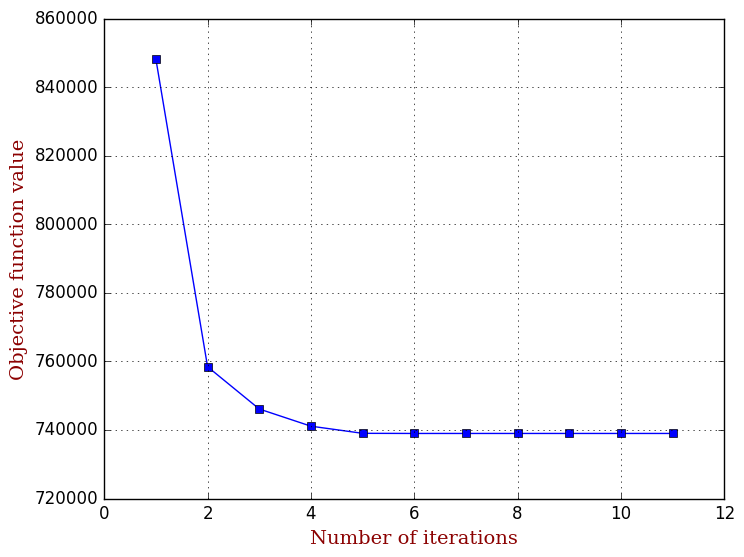

In [22]:
using PyPlot

iterNum = 1:11

objFun = map(iterNum->objFunDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

# xlim(-0.1, 1.6);
# ylim(0.9, 2.0);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value", fontdict=font1)

savefig("objFun_Sioux_simp.pdf")